In [57]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import skew
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [58]:
train = pd.read_csv('C:/Users/Latika Bisht/Downloads/train_LZdllcl.csv')
test = pd.read_csv('C:/Users/Latika Bisht/Downloads/test_2umaH9m.csv')

In [59]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [60]:
test.shape

(23490, 13)

In [61]:
# describing the training set
train.describe(include = 'all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [63]:
# checkig the no. of Employees Promoted

train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [64]:
# finding the %age of people promoted
promoted = (4668/54808)*100
print("Percentage of Promoted Employees is {:.2f}%".format(promoted))

Percentage of Promoted Employees is 8.52%


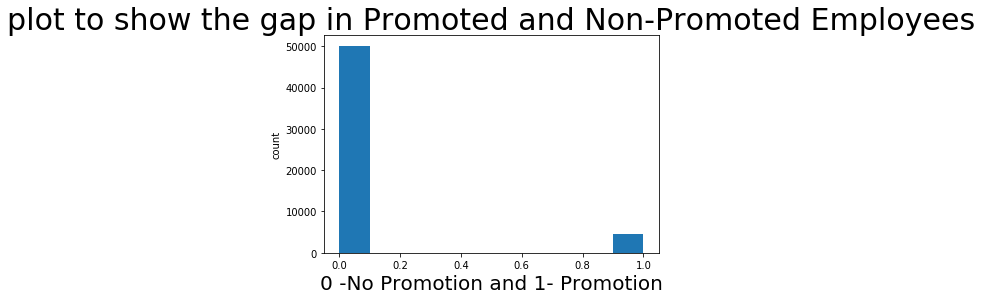

In [65]:
#plotting a scatter plot 

plt.hist(train['is_promoted'])
plt.title('plot to show the gap in Promoted and Non-Promoted Employees', fontsize = 30)
plt.xlabel('0 -No Promotion and 1- Promotion', fontsize = 20)
plt.ylabel('count')
plt.show()

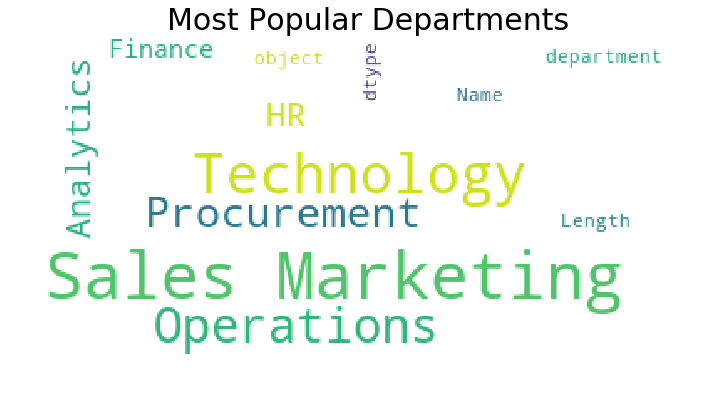

In [66]:
# looking at the most popular departments
from wordcloud import WordCloud, STOPWORDS

stopword = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopword).generate(str(train['department']))

plt.rcParams['figure.figsize'] = (12, 8)
print(wordcloud)
plt.imshow(wordcloud)
plt.title('Most Popular Departments', fontsize = 30)
plt.axis('off')
plt.show()

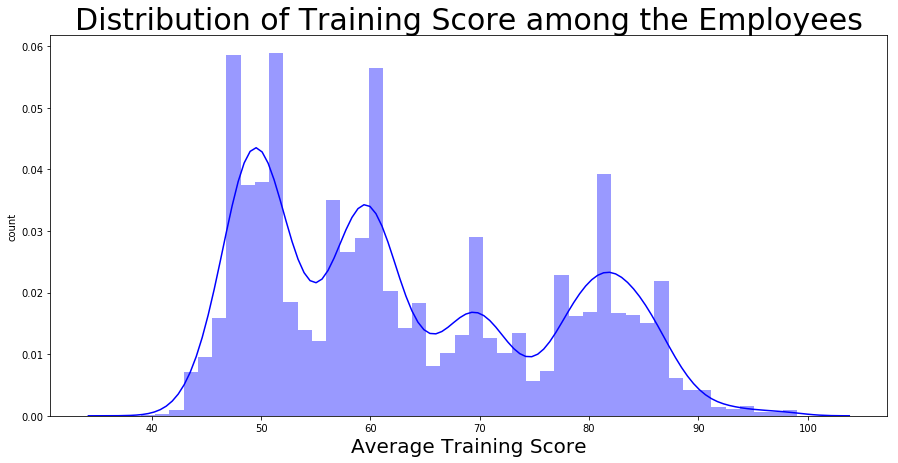

In [67]:
# checking the distribution of the avg_training score of the Employees

plt.rcParams['figure.figsize'] = (15, 7)
sns.distplot(train['avg_training_score'], color = 'blue')
plt.title('Distribution of Training Score among the Employees', fontsize = 30)
plt.xlabel('Average Training Score', fontsize = 20)
plt.ylabel('count')
plt.show()

In [68]:
train['awards_won?'].value_counts()

0    53538
1     1270
Name: awards_won?, dtype: int64

In [70]:
train['KPIs_met >80%'].value_counts()

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

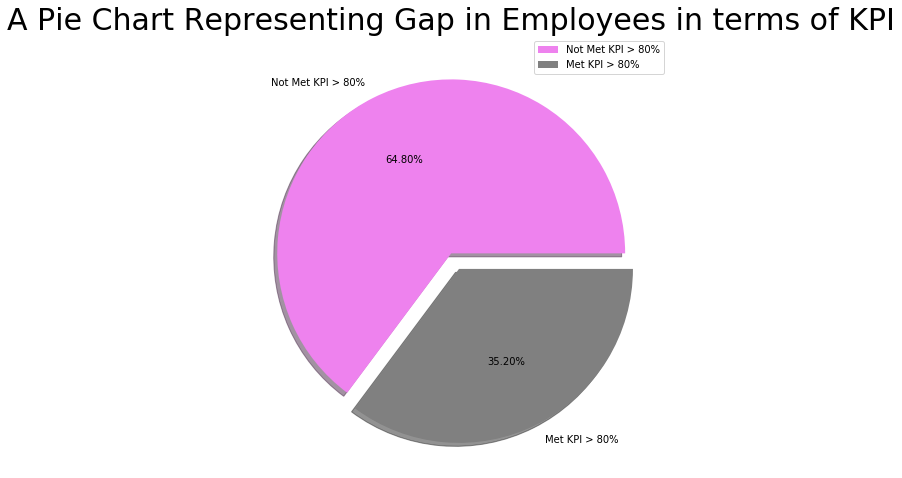

In [71]:
# plotting a pie chart


size = [35517, 19291]
labels = "Not Met KPI > 80%", "Met KPI > 80%"
colors = ['violet', 'grey']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Gap in Employees in terms of KPI', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

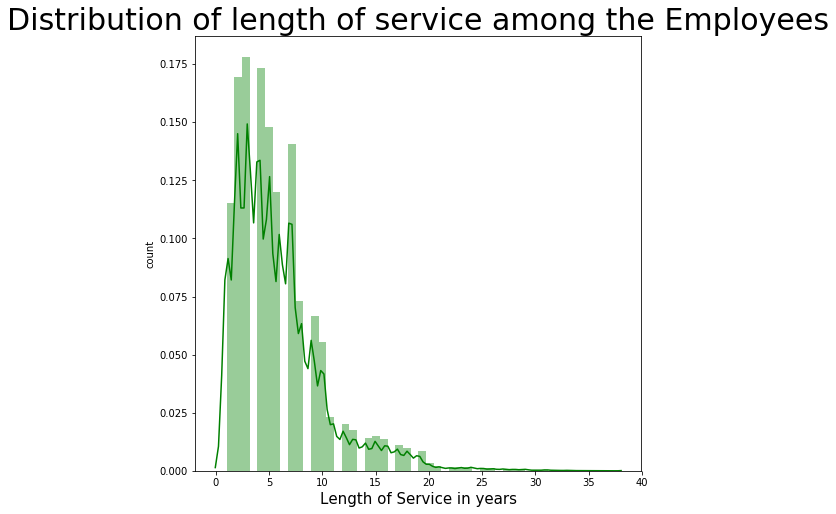

In [72]:
# checking the distribution of length of service

sns.distplot(train['length_of_service'], color = 'green')
plt.title('Distribution of length of service among the Employees', fontsize = 30)
plt.xlabel('Length of Service in years', fontsize = 15)
plt.ylabel('count')
plt.show()

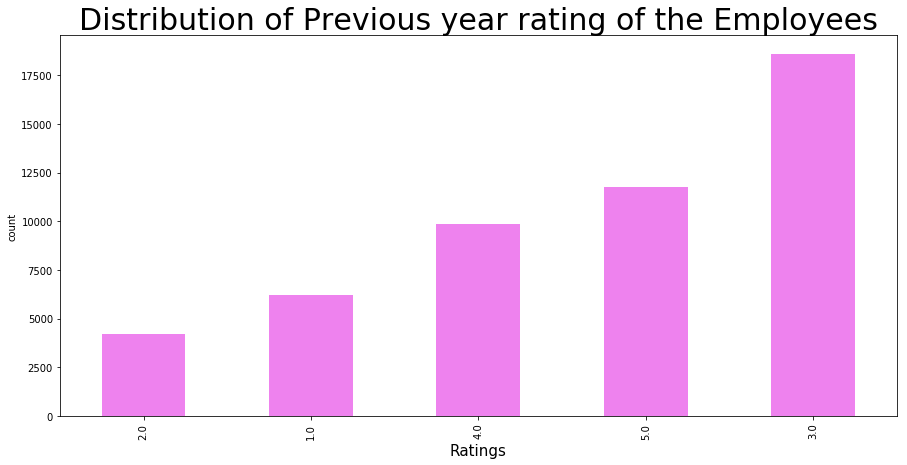

In [73]:
train['previous_year_rating'].value_counts().sort_values().plot.bar(color = 'violet', figsize = (15, 7))
plt.title('Distribution of Previous year rating of the Employees', fontsize = 30)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('count')
plt.show()

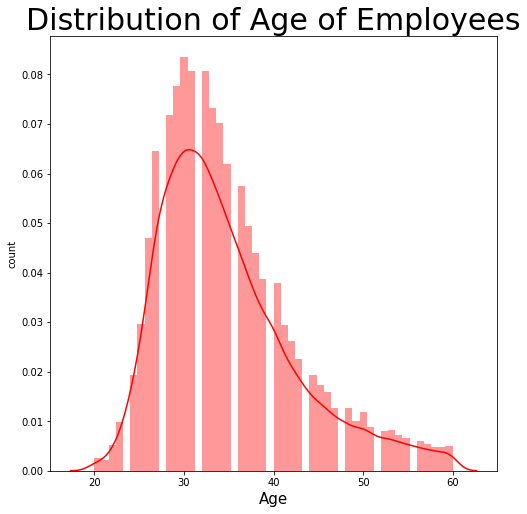

In [74]:
# checking the distribution of age of Employees in the company

sns.distplot(train['age'], color = 'red')
plt.title('Distribution of Age of Employees', fontsize = 30)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('count')
plt.show()

In [75]:
# checking the different types of recruitment channels for the company

train['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

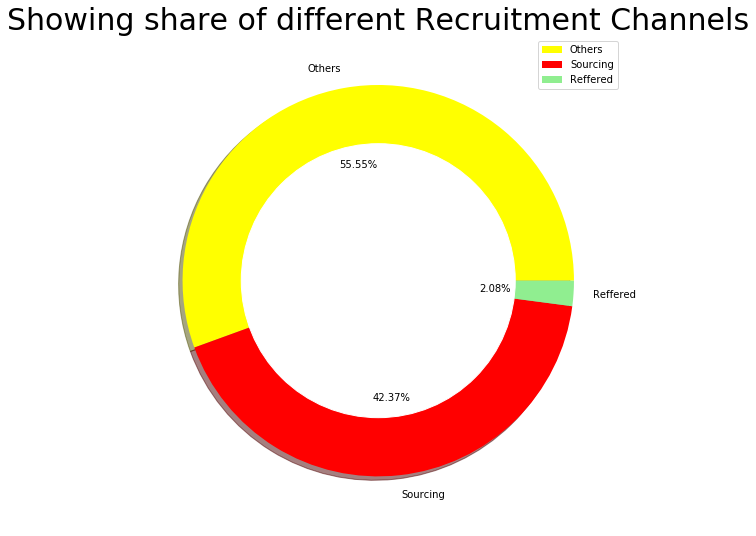

In [76]:
# plotting a donut chart for visualizing each of the recruitment channel's share

size = [30446, 23220, 1142]
colors = ['yellow', 'red', 'lightgreen']
labels = "Others", "Sourcing", "Reffered"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing share of different Recruitment Channels', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [77]:
# checking the gender gap

train['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

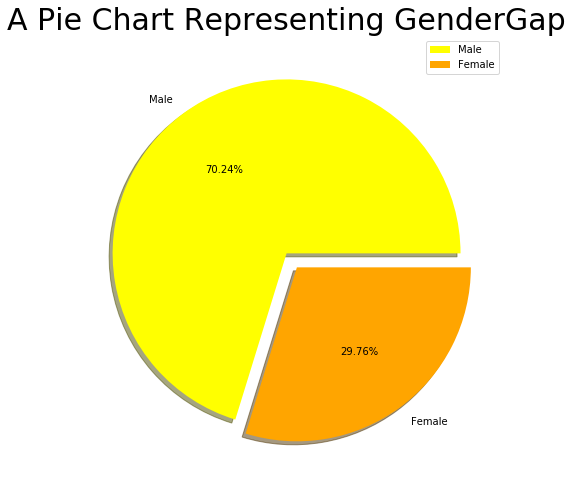

In [78]:
# plotting a pie chart

size = [38496, 16312]
labels = "Male", "Female"
colors = ['yellow', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing GenderGap', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

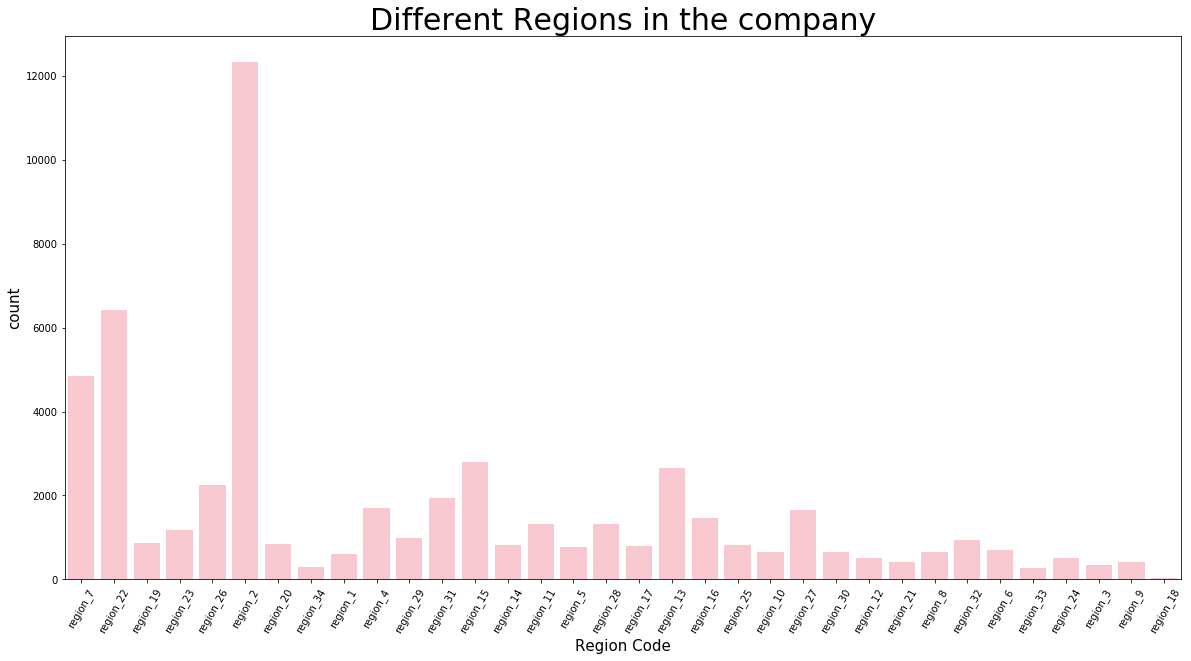

In [79]:
# checking the different regions of the company

plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(train['region'], color = 'pink')
plt.title('Different Regions in the company', fontsize = 30)
plt.xticks(rotation = 60)
plt.xlabel('Region Code', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

# Bi-varaiate Data Visualization

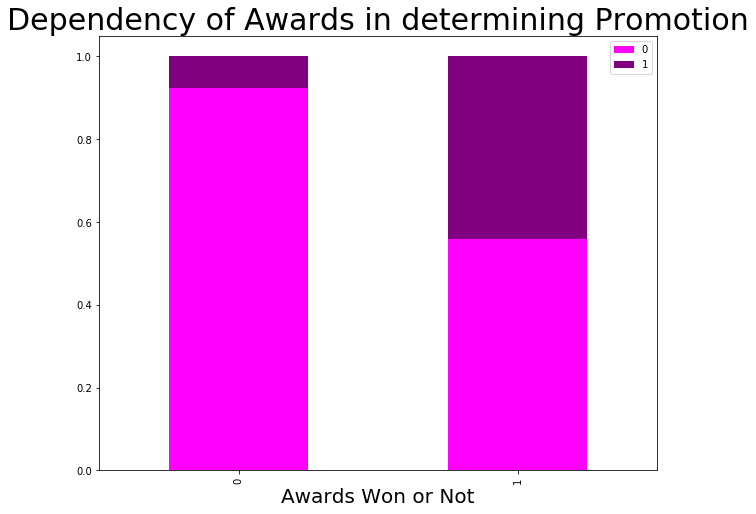

In [80]:
# dependency of awards won on promotion

data = pd.crosstab(train['awards_won?'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['magenta', 'purple'])

plt.title('Dependency of Awards in determining Promotion', fontsize = 30)
plt.xlabel('Awards Won or Not', fontsize = 20)
plt.legend()
plt.show()


# There is a very good chance of getting promoted if the employee has won an award

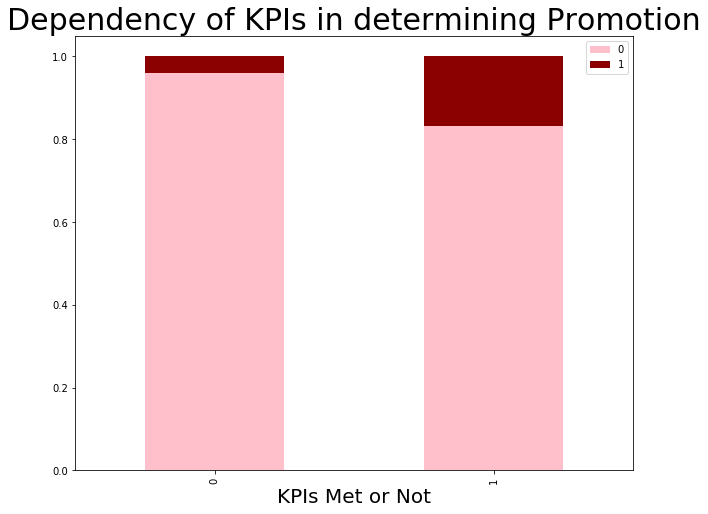

In [81]:
#dependency of KPIs with Promotion

data = pd.crosstab(train['KPIs_met >80%'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['pink', 'darkred'])

plt.title('Dependency of KPIs in determining Promotion', fontsize = 30)
plt.xlabel('KPIs Met or Not', fontsize = 20)
plt.legend()
plt.show()

# Again Having a good KPI score increases the chances of getting promoted in the company.

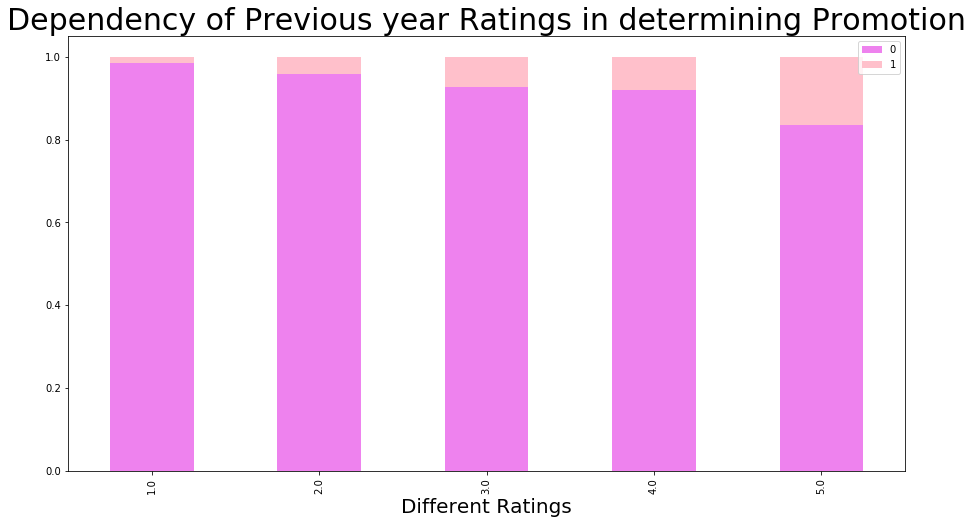

In [82]:
data = pd.crosstab(train['previous_year_rating'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 8), color = ['violet', 'pink'])

plt.title('Dependency of Previous year Ratings in determining Promotion', fontsize = 30)
plt.xlabel('Different Ratings', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
#The Above Graph clearly suggests that previous ratings matter a lot, if the ratings are high, the chances of being
#promoted in the company increases and there is completely no  promotion for the employees with previous year ratings = 0

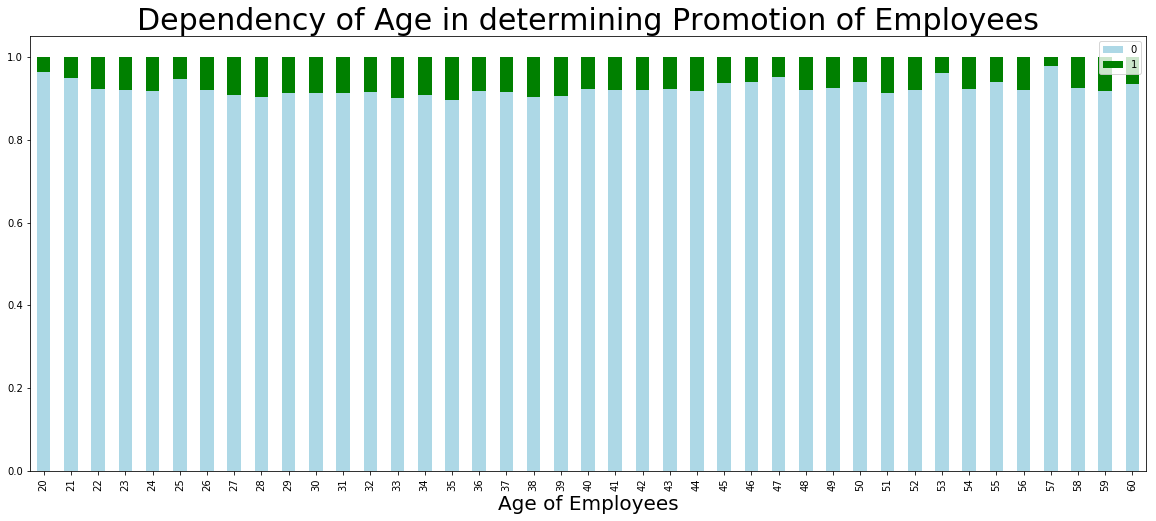

In [83]:
# checking dependency of age factor in promotion of employees

data = pd.crosstab(train['age'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightblue', 'green'])

plt.title('Dependency of Age in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Age of Employees', fontsize = 20)
plt.legend()
plt.show()

In [84]:
#This is Very Impressive that the company promotes employees of all the ages equally even the freshers 
#have equal share of promotion and also the senior citizen employees are getting the equal share of Promotion in the Company

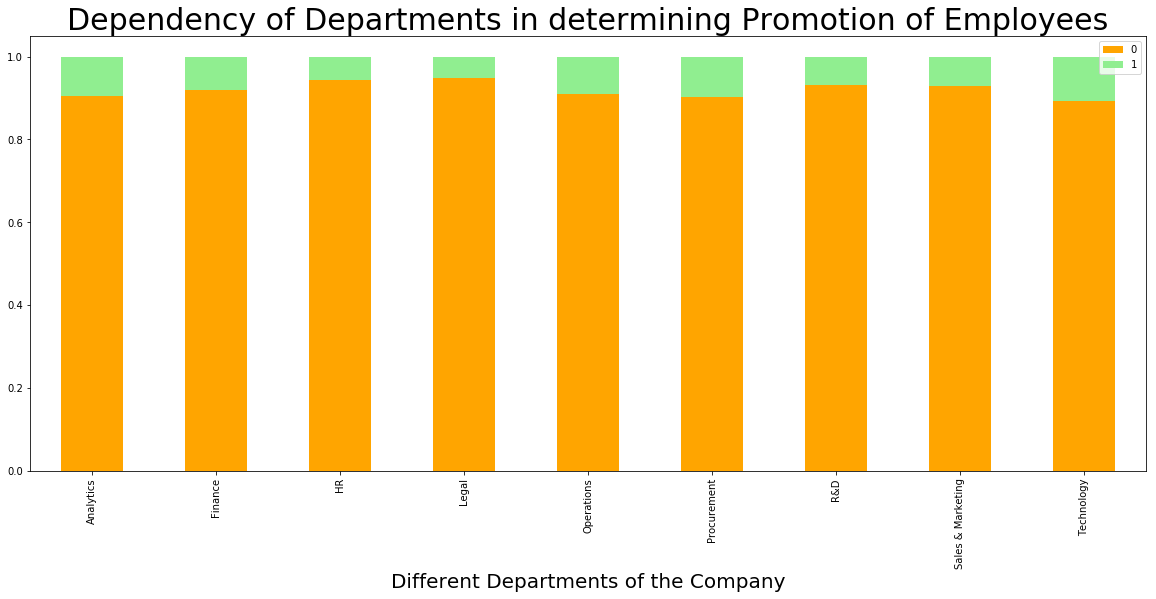

In [86]:
# checking which department got most number of promotions

data = pd.crosstab(train['department'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['orange', 'lightgreen'])

plt.title('Dependency of Departments in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Different Departments of the Company', fontsize = 20)
plt.legend()
plt.show()

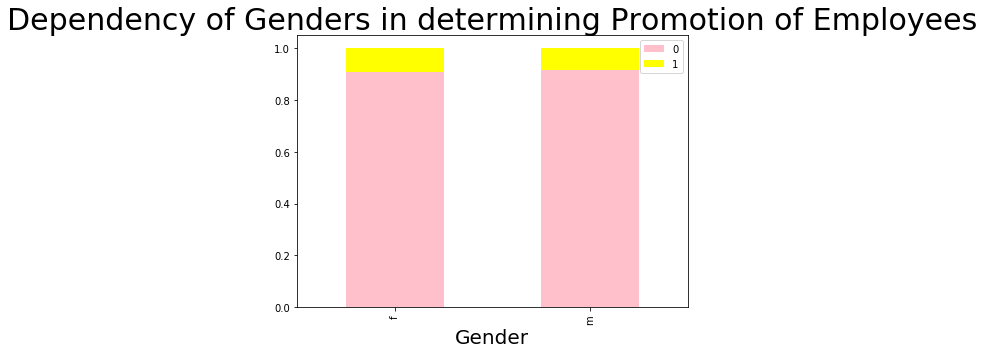

In [87]:
# checking dependency of gender over promotion

data = pd.crosstab(train['gender'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5), color = ['pink', 'yellow'])

plt.title('Dependency of Genders in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Gender', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
#The above plot shows that there is no partiality between males and females in terms of promotion

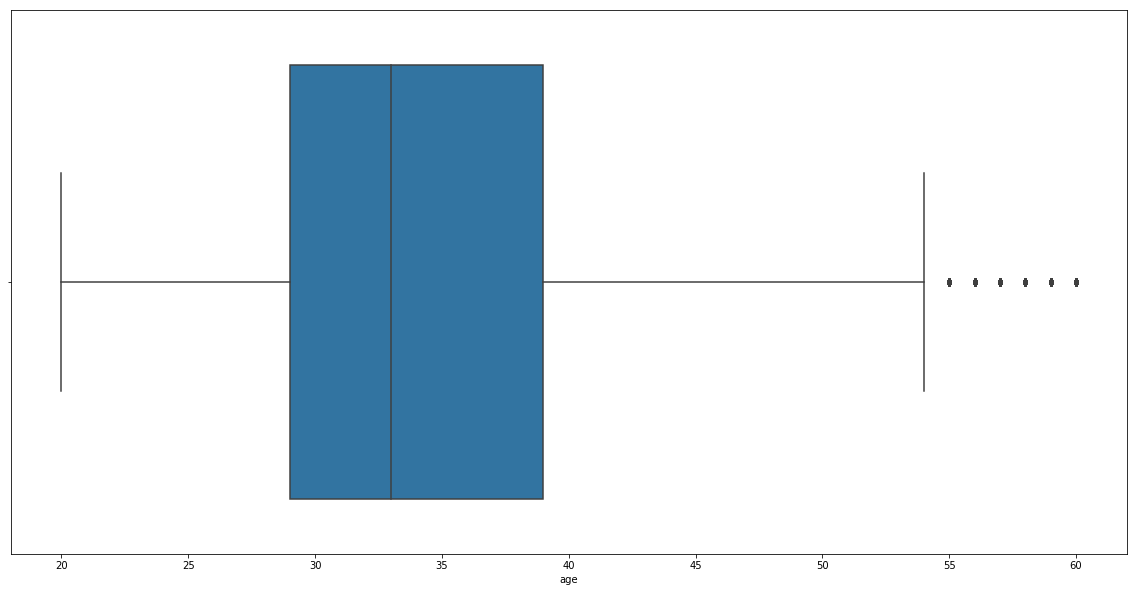

In [92]:
#Removing Outliers
####################################
sns.boxplot(x=train['age'])

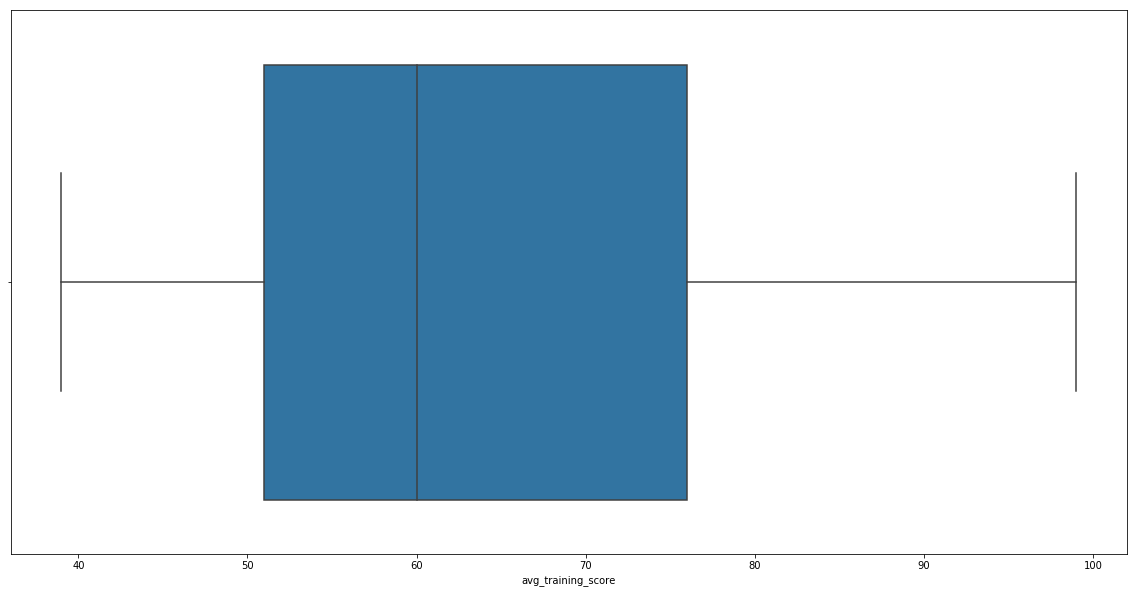

In [93]:
sns.boxplot(x=train['avg_training_score'])

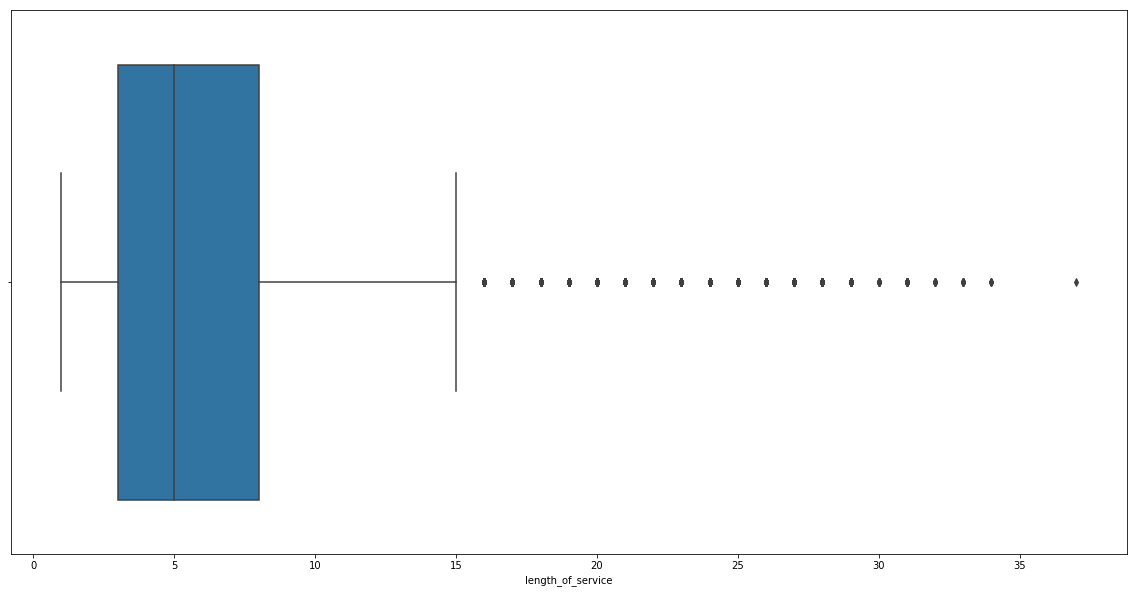

In [94]:
sns.boxplot(x=train['length_of_service'])

# Data Pre-processing

In [89]:
train['previous_year_rating'] = train['previous_year_rating'].fillna(0) 

In [90]:
train.dropna(axis=0,subset=['education'],inplace=True)

In [91]:
train.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

29.0 39.0 10.0


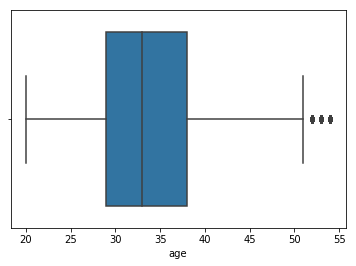

In [18]:
#Training Data- Age outlier removal
#continously need to run this code and box plot, until the outliers are removed

train_Age_Q1 = train['age'].quantile(0.25)
train_Age_Q3 = train['age'].quantile(0.75)
train_Age_IQR = train_Age_Q3 - train_Age_Q1
print(train_Age_Q1,train_Age_Q3,train_Age_IQR)
train = train[~((train.age<(train_Age_Q1-1.5*train_Age_IQR))|(train.age>(train_Age_Q3+1.5*train_Age_IQR)))]
sns.boxplot(x=train['age'])

3.0 7.0 4.0


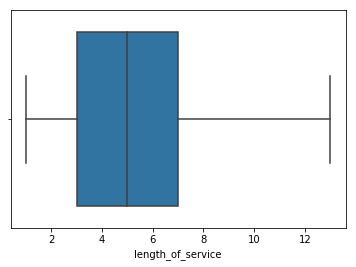

In [19]:
#Training Data - length_of_service outlier removal
#length_of_service
train_LengthOfService_Q1 = train['length_of_service'].quantile(0.25)
train_LengthOfService_Q3 = train['length_of_service'].quantile(0.75)
train_LengthOfService_IQR = train_LengthOfService_Q3 - train_LengthOfService_Q1
print(train_LengthOfService_Q1,train_LengthOfService_Q3,train_LengthOfService_IQR)
train = train[~((train.length_of_service<(train_LengthOfService_Q1-1.5*train_LengthOfService_IQR))|(train.length_of_service>(train_LengthOfService_Q3+1.5*train_LengthOfService_IQR)))]
sns.boxplot(x=train['length_of_service'])

In [3]:
is_promoted_Count = pd.crosstab(index=train["is_promoted"],columns="count") 
is_promoted_Count

col_0,count
is_promoted,
0,50140
1,4668


1.01


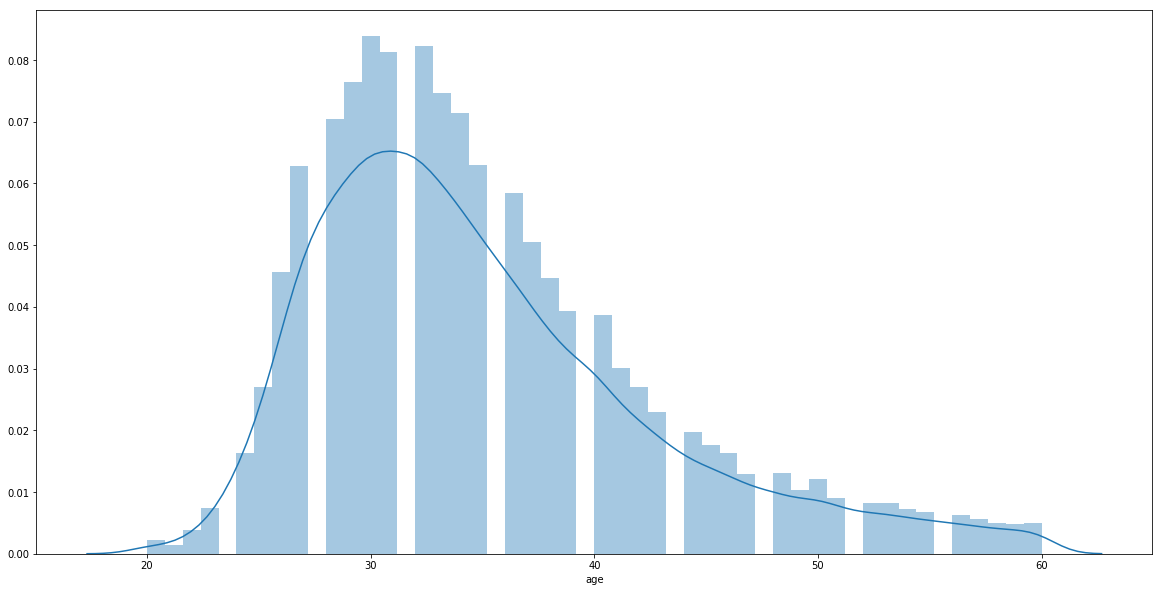

In [95]:
#Checking Skewness

sns.distplot(train['age'])
print(round(skew(train['age']),2)) #0.5

1.73


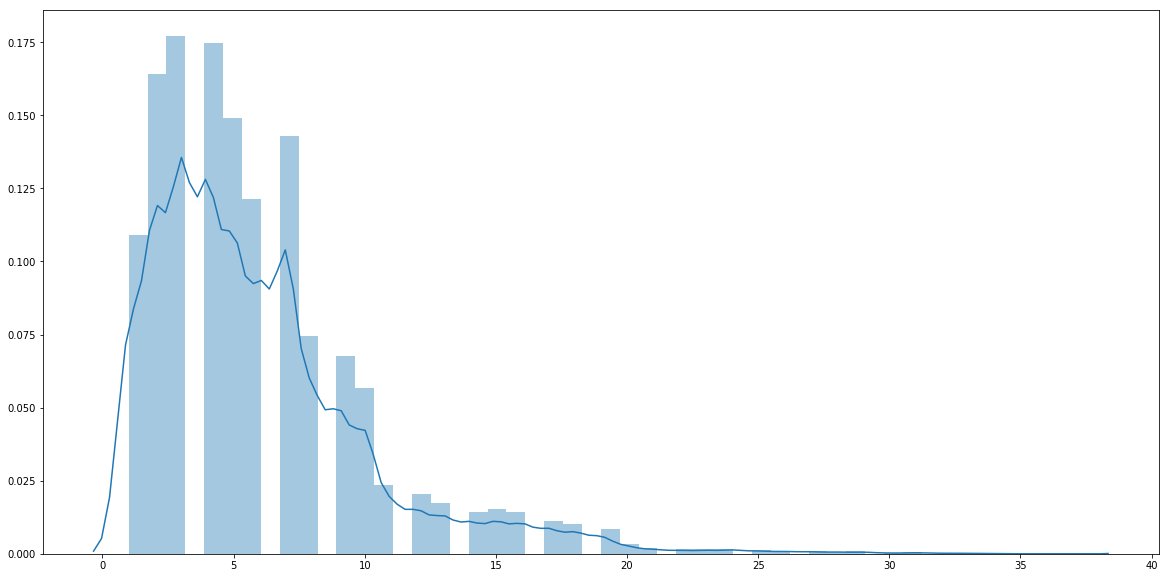

In [96]:
sns.distplot(train['length_of_service'].values)
print(round(skew(train['length_of_service']),2)) 

0.43


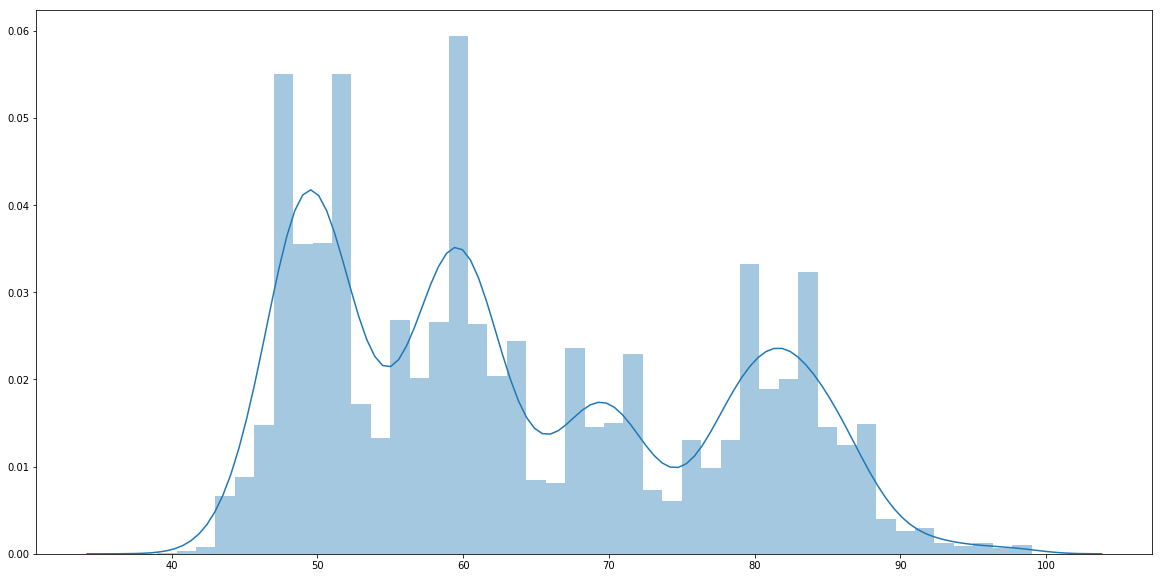

In [97]:
sns.distplot(train['avg_training_score'].values)
print(round(skew(train['avg_training_score']),2)) #0.42

Before log transformation: 1.0139121613410362
After log transformation: 0.4995356008022259


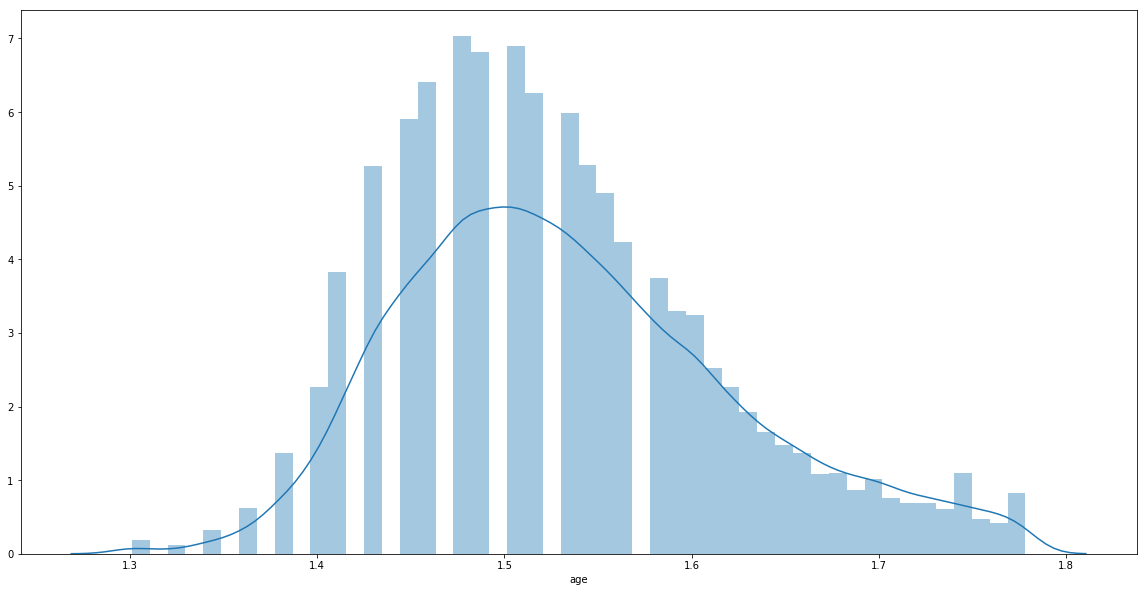

In [98]:
#Normalizing the training data
#sns.distplot(train['age'])
print("Before log transformation:",skew(train['age']))
print("After log transformation:",skew(np.log10(train['age'])))
sns.distplot(np.log10(train['age']))

Before sqrt transformation: 1.7278523271634745
After sqrt transformation: 0.6537367081029053


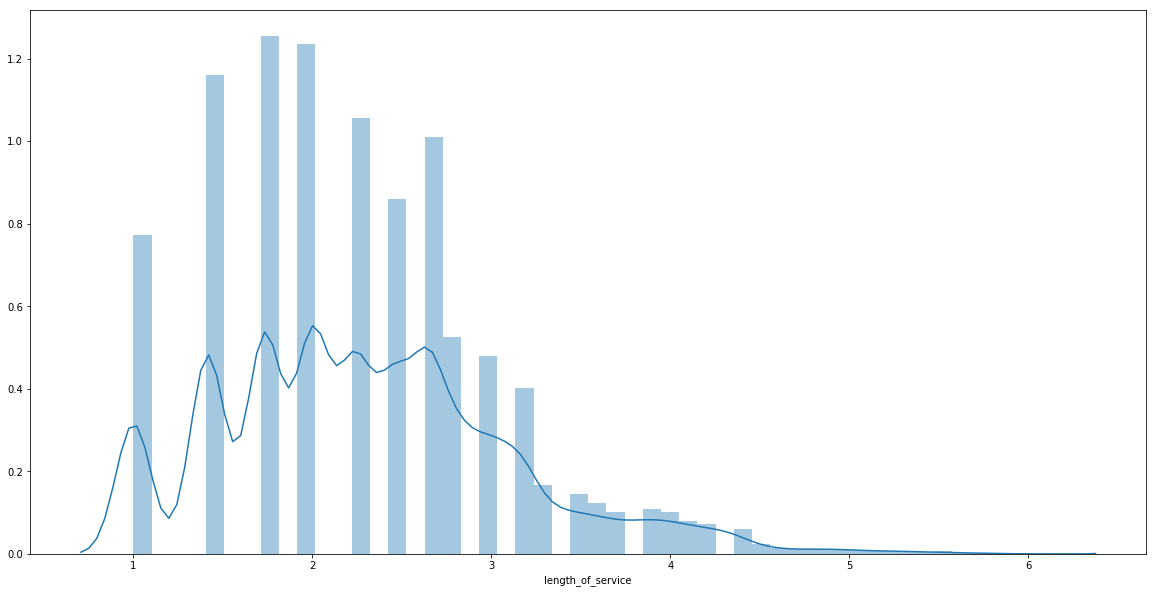

In [99]:
print("Before sqrt transformation:",skew(train['length_of_service']))
print("After sqrt transformation:",skew(np.sqrt(train['length_of_service'])))
sns.distplot(np.sqrt(train['length_of_service']))

Before log transformation: 0.4277987757380849
After log transformation: 0.19390805712917475


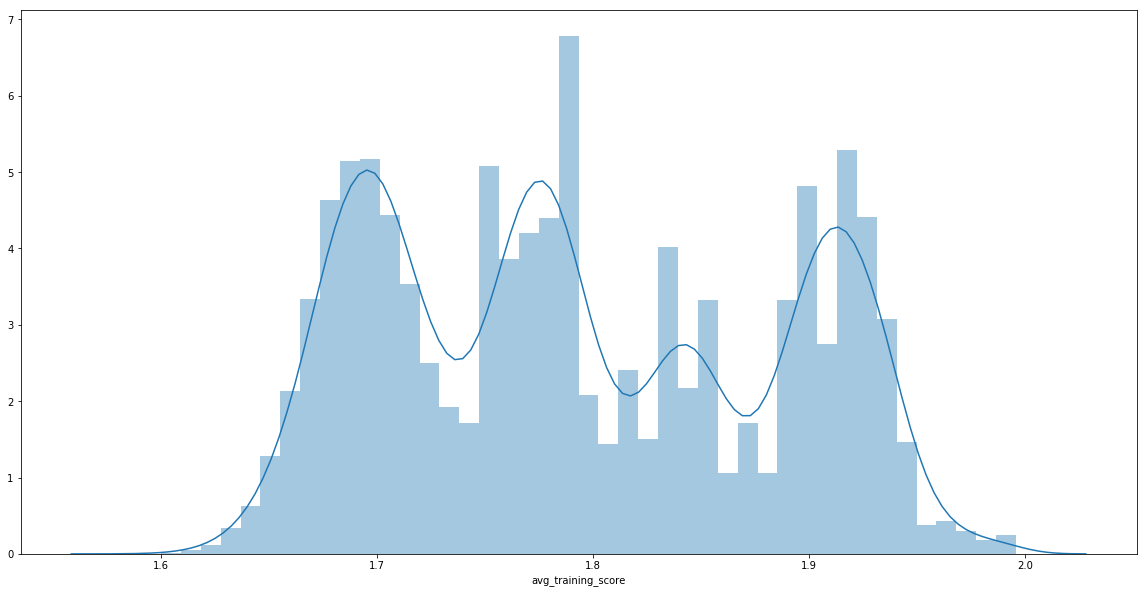

In [100]:
print("Before log transformation:",skew(train['avg_training_score']))
print("After log transformation:",skew(np.log10(train['avg_training_score'])))
sns.distplot(np.log10(train['avg_training_score']))

In [101]:
train['age'] = np.log10(train['age'])
train['length_of_service'] = np.sqrt(train['length_of_service'])
train['avg_training_score'] = np.log10(train['avg_training_score'])

In [102]:
#One hot encoding
train = pd.get_dummies(train)

In [103]:
#Spliting the data
y = train['is_promoted']
x = train.drop(['is_promoted'],axis=1)

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=123)

#Model Building and predicting
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(x,y)
#regressor.fit(x_train,y_train)

y_pred = regressor.predict(x_test)

In [105]:
#Validating model
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y_test, y_pred)
results

from sklearn.metrics import accuracy_score
print("Accuracy score is :",round(accuracy_score(y_test, y_pred),2))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy score is : 0.91
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     14326
           1       0.00      0.00      0.00      1394

   micro avg       0.91      0.91      0.91     15720
   macro avg       0.46      0.50      0.48     15720
weighted avg       0.83      0.91      0.87     15720



29.0 39.0 10.0
3.0 7.0 4.0
0.8
0.6
0.43
Before log transformation: 0.796637459155082
After log transformation: 0.3159676282515619
Before sqrt transformation: 0.6023853941864962
After sqrt transformation: 0.0371018819065954
Before sqrt transformation: 0.4305453381108443
After sqrt transformation: 0.20218635236844404


ValueError: X has 58 features per sample; expecting 59

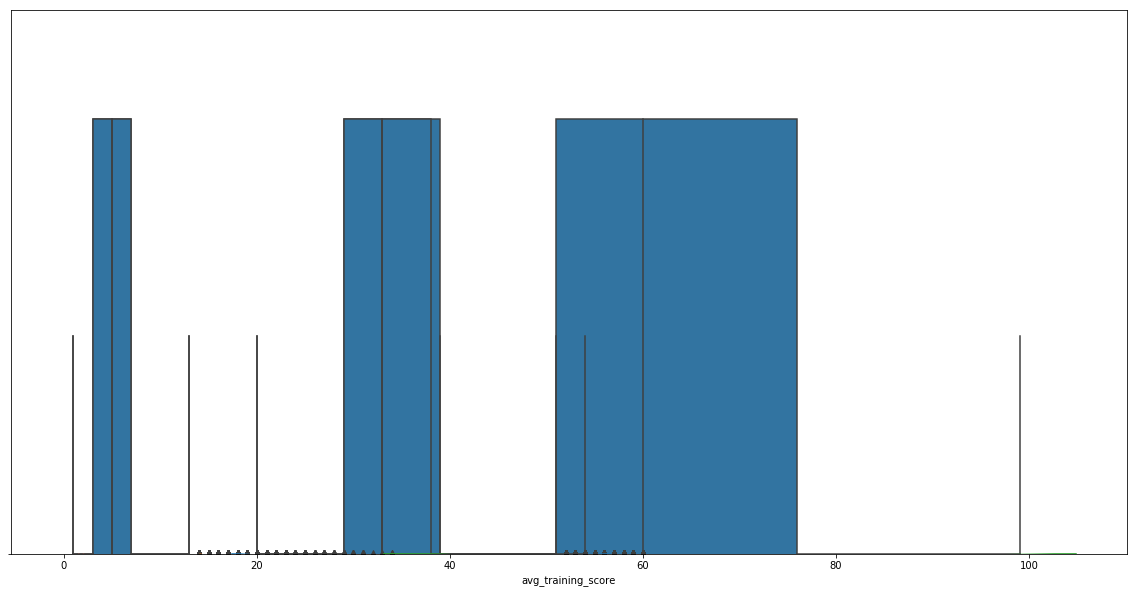

In [106]:
#########################Preprocessing Test Data####################################
test = pd.read_csv('C:/Users/Latika Bisht/Downloads/test_2umaH9m.csv')
#test = test.drop(["employee_id"],axis=1)

#Removing Outliers
####################################
sns.boxplot(x=test['age'])
sns.boxplot(x=test['length_of_service'])
sns.boxplot(x=test['avg_training_score'])

#Training Data- Age outlier removal
#continously need to run this code and box plot, until the outliers are removed
test_Age_Q1 = test['age'].quantile(0.25)
test_Age_Q3 = test['age'].quantile(0.75)
test_Age_IQR = test_Age_Q3 - test_Age_Q1
print(test_Age_Q1,test_Age_Q3,test_Age_IQR)
test = test[~((test.age<(test_Age_Q1-1.5*test_Age_IQR))|(test.age>(test_Age_Q3+1.5*test_Age_IQR)))]
sns.boxplot(x=test['age'])

#Training Data - length_of_service outlier removal
#length_of_service
test_LengthOfService_Q1 = test['length_of_service'].quantile(0.25)
test_LengthOfService_Q3 = test['length_of_service'].quantile(0.75)
test_LengthOfService_IQR = test_LengthOfService_Q3 - test_LengthOfService_Q1
print(test_LengthOfService_Q1,test_LengthOfService_Q3,test_LengthOfService_IQR)
test = test[~((test.length_of_service<(test_LengthOfService_Q1-1.5*test_LengthOfService_IQR))|(test.length_of_service>(test_LengthOfService_Q3+1.5*test_LengthOfService_IQR)))]
sns.boxplot(x=test['length_of_service'])

#Missing value imputation
test.isna().sum()
test.dropna(axis=0,subset=['education'],inplace=True)
test['previous_year_rating'] = test['previous_year_rating'].fillna(0) 
test.isna().sum()

#Checking Skewness
sns.distplot(test['age'])
print(round(skew(test['age']),2)) #0.51

sns.distplot(test['length_of_service'].values)
print(round(skew(test['length_of_service']),2)) #0.6

sns.distplot(test['avg_training_score'].values)
print(round(skew(test['avg_training_score']),2)) #0.43

#Normalizing the training data
#sns.distplot(train['age'])
print("Before log transformation:",skew(test['age']))
print("After log transformation:",skew(np.log10(test['age'])))
sns.distplot(np.log10(test['age']))

print("Before sqrt transformation:",skew(test['length_of_service']))
print("After sqrt transformation:",skew(np.sqrt(test['length_of_service'])))
sns.distplot(np.sqrt(test['length_of_service']))

print("Before sqrt transformation:",skew(test['avg_training_score']))
print("After sqrt transformation:",skew(np.log10(test['avg_training_score'])))
sns.distplot(np.log10(test['avg_training_score']))

test['age'] = np.log10(test['age'])
test['length_of_service'] = np.sqrt(test['length_of_service'])
test['avg_training_score'] = np.log10(test['avg_training_score'])

#One hot encoding
test = pd.get_dummies(test)

employeeID = pd.DataFrame(test['employee_id'],columns=['employee_id'])
test = test.drop(["employee_id"],axis=1)

#Predicting the value
y_pred_test = regressor.predict(test)


In [ ]:
#Converting test data predictions to dataframe
isPromoted = pd.DataFrame(y_pred_test,columns=['IsPromoted'])

is_promoted_Count_Test = pd.crosstab(index=isPromoted["IsPromoted"],columns="count") 
is_promoted_Count_Test

employeeID.reset_index(drop = True,inplace=True)
isPromoted.reset_index(drop = True,inplace=True)

#Concatenating the dataframes
finalData = pd.concat([employeeID,isPromoted],axis=1)

In [ ]:
finalData.tail(250)